## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib import rcParams
import matplotlib.animation as animation
import matplotlib.patheffects as path_effects

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Data Preprocessing


In [6]:
def missing_info(data):
  '''
  Missing info function to check the missing values by count, % and unique values.
  '''
  details = pd.DataFrame()
  details['missing_values'] = round(data.isnull().sum())
  details['missing_values_%'] = round((data.isnull().sum()/len(data))*100,2)
  details['N_unique'] = data.nunique()
  details['dtype'] = data.dtypes
  details['mode'] = [data[col].value_counts().index[0] for col in data]
  return details

In [7]:
missing_info(df)

,missing_values,missing_values_%,N_unique,dtype,mode
ID,0,0.00,135571,int64,77710
Name,0,0.00,134732,object,Robert Tait McKenzie
Sex,0,0.00,2,object,M
Age,9474,3.49,74,float64,23
Height,60171,22.19,95,float64,180
Weight,62875,23.19,220,float64,70
Team,0,0.00,1184,object,United States
NOC,0,0.00,230,object,USA
Games,0,0.00,51,object,2000 Summer
Year,0,0.00,35,int64,1992


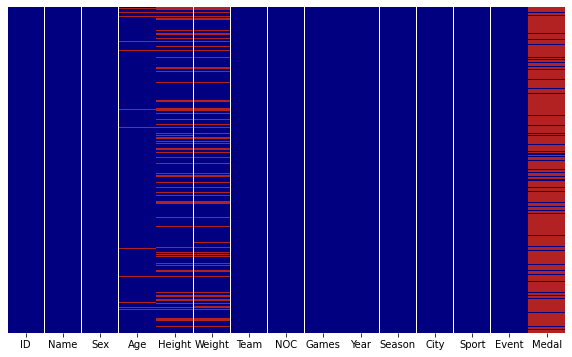

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

#visualize the missing data
sns.heatmap(ax=ax, data=df.isnull(), yticklabels=False, cbar=False, cmap=['navy','firebrick']);

In [9]:
#Dropping art comp due to inconsistent of data (age 106 etc)
arts = df[df['Sport'] == 'Art Competitions'].index
df = df.drop(arts)

In [10]:
#Filling the missing Medal column values (for athletes who didn't win any medals)
df['Medal'] = df['Medal'].fillna('none')

In [11]:
##df['Medal'].apply(lambda med: 'none' if pd.isnull(med) else med)

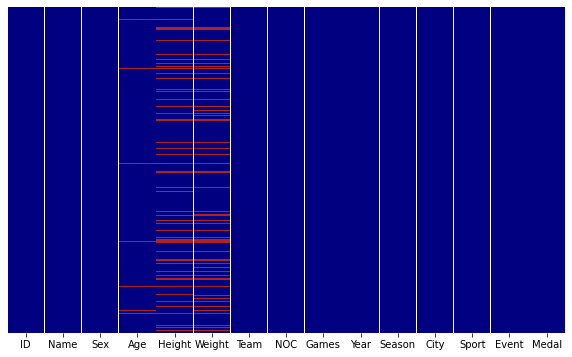

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(ax=ax, data=df.isnull(), yticklabels=False, cbar=False, cmap=['navy','firebrick']);

In [13]:
#df_avereged_weight = df.groupby(['Sport','Sex'])[['Weight']].mean().to_dict()
#df_avereged_height = df.groupby(['Sport','Sex'])[['Height']].mean().to_dict()

In [14]:
#df['Weight'] = df['Weight'].fillna(0)
#df['Height'] = df['Weight'].fillna(0)

In [15]:
# def avg_filler(param,Sex,Sport,calc):

#   if (calc == 'Weight') and (param==0):
#     return df_avereged_weight[calc][(Sport,Sex)]

#   if (calc == 'Height') and (param==0):
#     return df_avereged_height[calc][(Sport,Sex)]

#   if param != 0:
#     return param

In [16]:
# df['Weight'] = np.vectorize(avg_filler)(df['Weight'],df['Sex'],df['Sport'],'Weight')
# df['Height'] = np.vectorize(avg_filler)(df['Height'],df['Sex'],df['Sport'],'Height')

# EDA

## Medals EDA

In [17]:
# Convert the data to only Summer sports
df = df[df['Season']=='Summer']

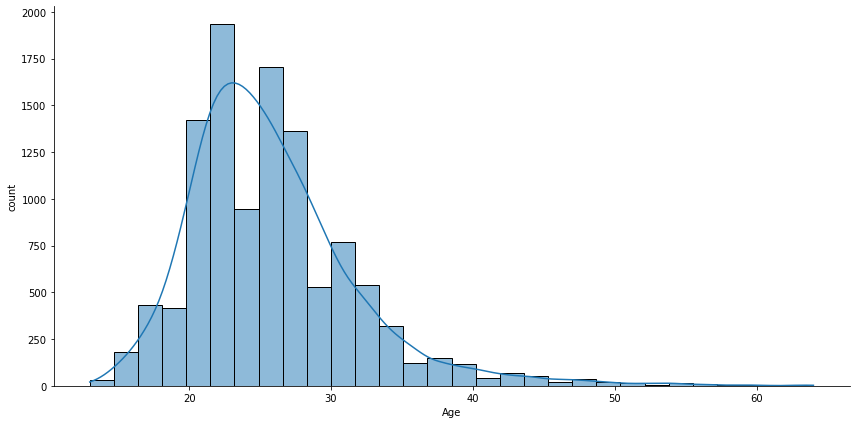

In [18]:
#Gold Medal Dist
ax = sns.displot(x=df[df['Medal'] == 'Gold']['Age'],bins=30,height=6,aspect=2,kind='hist',kde=True)
ax.set_titles('Gold Medal count by Age dist')
ax.set_ylabels('count');

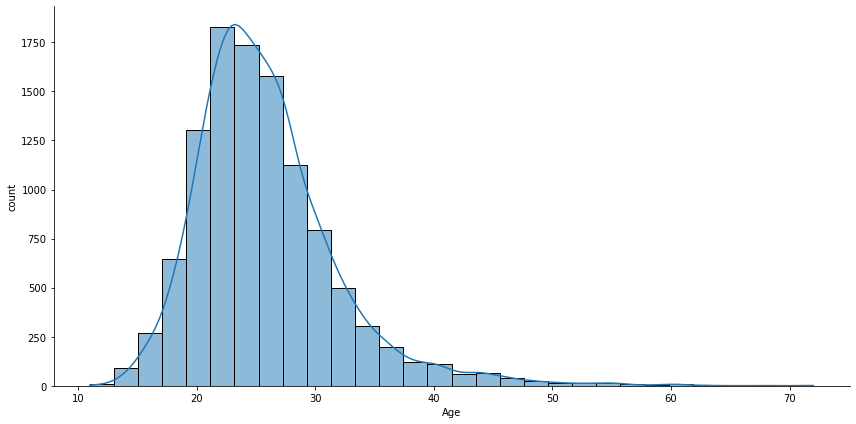

In [19]:
#Silver Medal Dist
ax = sns.displot(x=df[df['Medal'] == 'Silver']['Age'],bins=30,height=6,aspect=2,kind='hist',kde=True)
ax.set_titles('Silver Medal count by Age dist')
ax.set_ylabels('count');

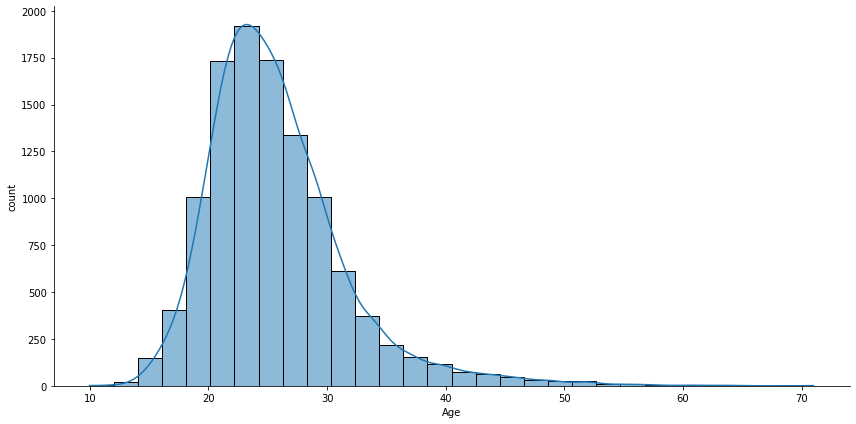

In [20]:
#Silver Medal Dist
ax = sns.displot(x=df[df['Medal'] == 'Bronze']['Age'],bins=30,height=6,aspect=2,kind='hist',kde=True)
ax.set_titles('Silver Medal count by Age dist')
ax.set_ylabels('count');

In [21]:
#Above Age 30
df_mature = round((df[(df['Medal']=='Gold') & (df['Age'] > 30)].groupby(df['Sport']).count()/df[df['Medal']=='Gold'].groupby(df['Sport']).count())*100,2).drop('Sport',axis=1)
df_mature = df_mature.reset_index()
df_mature = df_mature.sort_values(by='Medal',axis=0,ascending=False)

#Under Age 30
df_young = round((df[(df['Medal']=='Gold') & (df['Age'] < 30)].groupby(df['Sport']).count()/df[df['Medal']=='Gold'].groupby(df['Sport']).count())*100,2).drop('Sport',axis=1)
df_young = df_young.reset_index()
df_young = df_young.sort_values(by='Medal',axis=0,ascending=False)



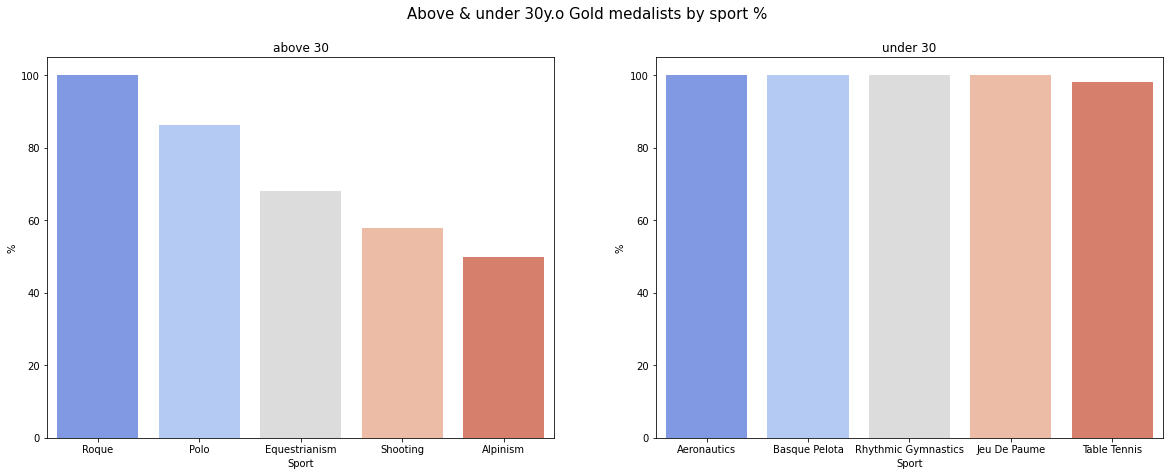

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
fig.suptitle('Above & under 30y.o Gold medalists by sport %',fontsize=15)


#Above 30
sns.barplot(ax=axes[0],x=df_mature['Sport'].iloc[:5],y=df_mature['Medal'],palette='coolwarm')
axes[0].set_ylabel('%')
axes[0].set_title('above 30')

#Under 30
sns.barplot(ax=axes[1],x=df_young['Sport'].iloc[:5],y=df_young['Medal'],palette='coolwarm')
axes[1].set_ylabel('%')
axes[1].set_title('under 30')
fig.subplots_adjust(hspace=1)


In [23]:
#Now lets check if something changed since Olympics became a professional sport

#Above Age 30
df_mature = round((df[(df['Medal']=='Gold') & (df['Age'] > 30) & (df['Year']>=1992)].groupby(df['Sport']).count()/df[(df['Medal']=='Gold') & (df['Year']>=1992)].groupby(df['Sport']).count())*100,2).drop('Sport',axis=1)
df_mature = df_mature.reset_index()
df_mature = df_mature.sort_values(by='Medal',axis=0,ascending=False)

#Under Age 30
df_young = round((df[(df['Medal']=='Gold')&(df['Age']<30)&(df['Year']>=1992)].groupby(df['Sport']).count()/df[(df['Medal']=='Gold')&(df['Year']>=1992)].groupby(df['Sport']).count())*100,2).drop('Sport',axis=1)
df_young = df_young.reset_index()
df_young = df_young.sort_values(by='Medal',axis=0,ascending=False)

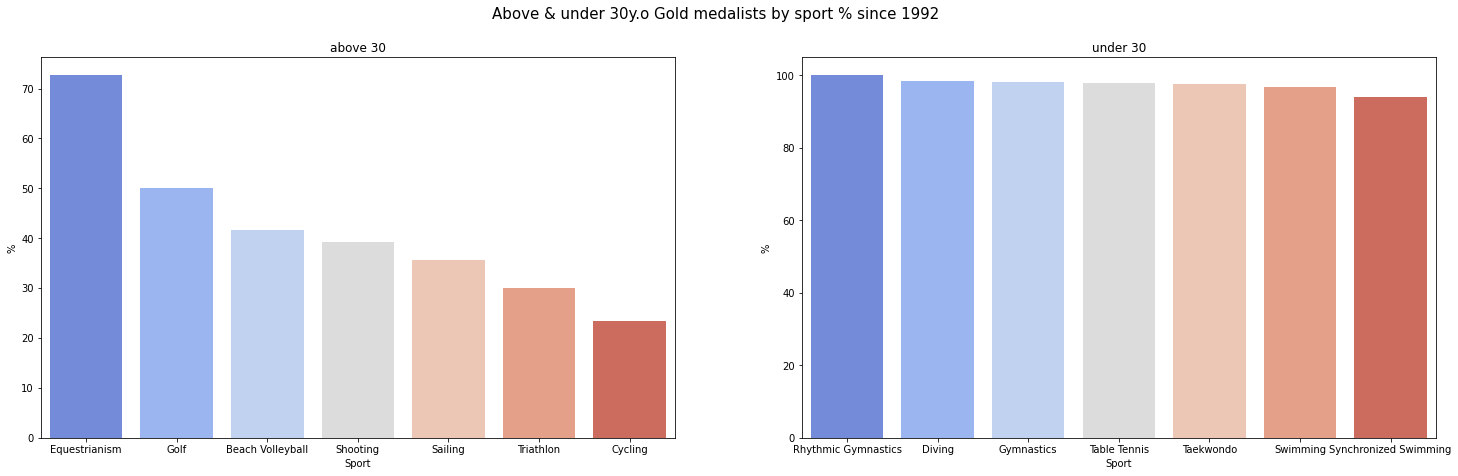

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(25,7))
fig.suptitle('Above & under 30y.o Gold medalists by sport % since 1992',fontsize=15)


#Above 30
sns.barplot(ax=axes[0],x=df_mature['Sport'].iloc[:7],y=df_mature['Medal'],palette='coolwarm')
axes[0].set_ylabel('%')
axes[0].set_title('above 30')

#Under 30
sns.barplot(ax=axes[1],x=df_young['Sport'].iloc[:7],y=df_young['Medal'],palette='coolwarm')
axes[1].set_ylabel('%')
axes[1].set_title('under 30')
fig.subplots_adjust(hspace=1)

## Age, Height & Weight

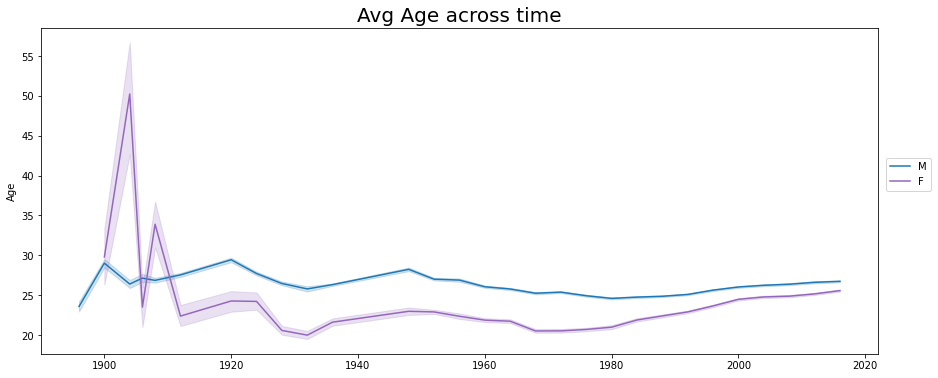

In [25]:
#Avg Age
color = {'M':'tab:blue','F':'tab:purple'} #colors

#plot & figure
fig = plt.figure(figsize=(15, 6))
ax= sns.lineplot(x='Year', y='Age', data=df, hue='Sex',palette = color)

#title & label
ax.set_xlabel("")
ax.set_title('Avg Age across time', fontsize=20)

#legends
ax.legend(loc=(1.01,0.5));

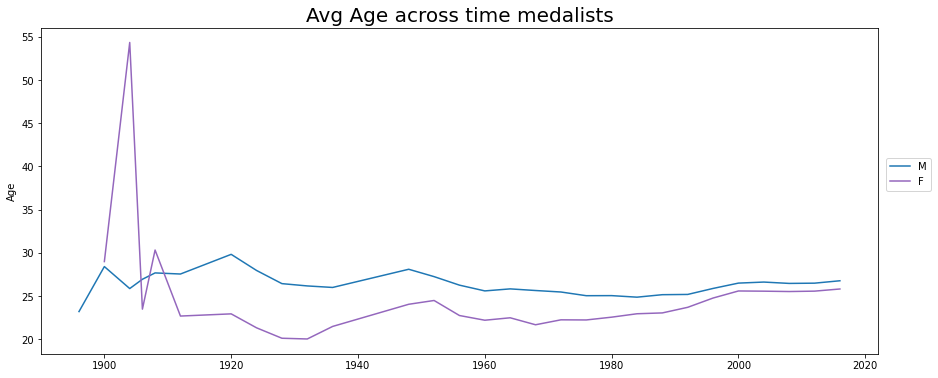

In [26]:
#Avg but only for medal != none:

#plot & figure
fig = plt.figure(figsize=(15, 6))
ax= sns.lineplot(x='Year', y='Age', data=df[df['Medal'] != 'none'], hue='Sex', ci=None, palette=color)

#title & label
ax.set_xlabel("")
ax.set_title('Avg Age across time medalists', fontsize=20)

#legends
ax.legend(loc=(1.01,0.5));

Text(0.5, 1.0, 'Age dist at the olympic games Male & Female')

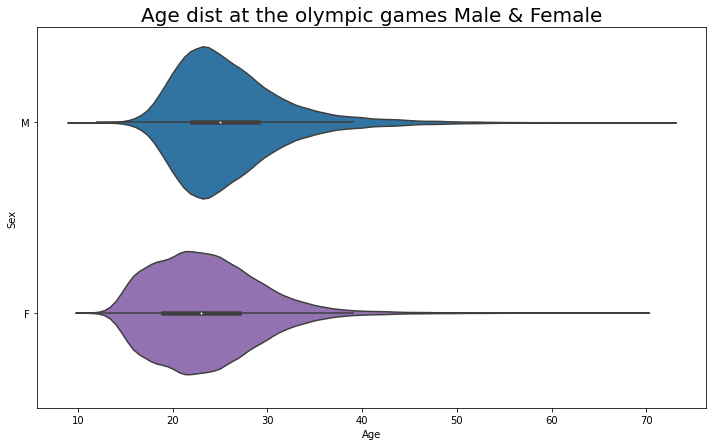

In [27]:
#plot & figure
fig = plt.figure(figsize=(12, 7))
ax= sns.violinplot(x='Age', data=df, y='Sex',palette=color)

#title & label
ax.set_xlabel("Age",fontsize=10)
ax.set_ylabel("Sex",fontsize=10)
ax.set_title('Age dist at the olympic games Male & Female', fontsize=20)

#legends;

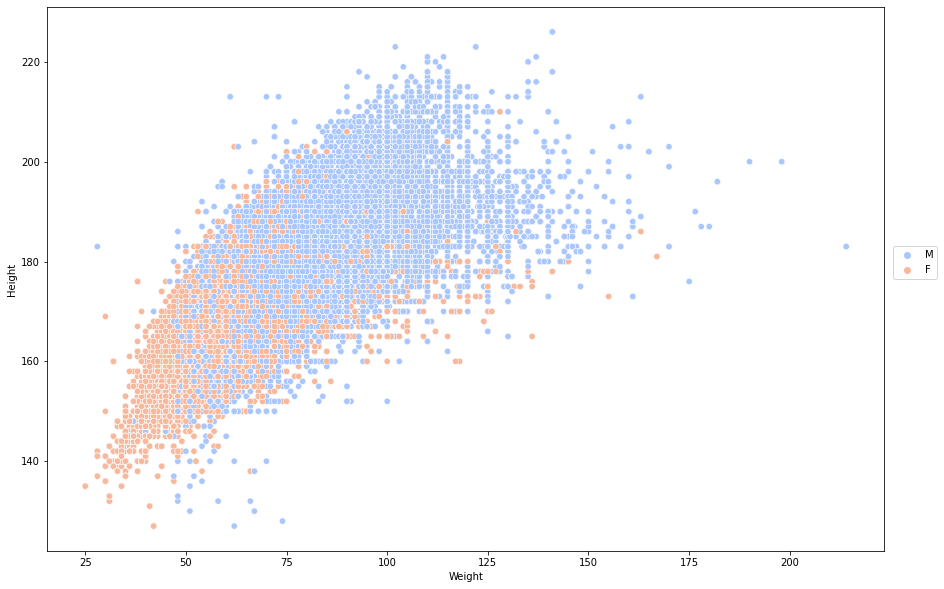

In [28]:
#height/Weight ratio
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(y=df['Height'], x=df['Weight'], hue=df['Sex'],s=40, palette='coolwarm')

ax.legend(loc=(1.01,0.5));

interesting, lowest weight is 25. I wonder who it is. 

In [29]:
df[df['Weight']==df['Weight'].min()].head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,none


similar to highest weight.

In [30]:
df[df['Weight']==df['Weight'].max()].head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,none


In [31]:
#Extracting the mean weight, age and height of a table
def avg_height_weight_age(table):
    mean_info=table.groupby(['ID','Age','Weight','Height'])['Name'].aggregate('count').reset_index().drop('Name',axis=1)
    mean_info=table.dropna()

    avg_age=mean_info['Age'].mean()
    avg_weight=mean_info['Weight'].mean()
    avg_height=mean_info['Height'].mean()

    return avg_age,avg_weight,avg_height

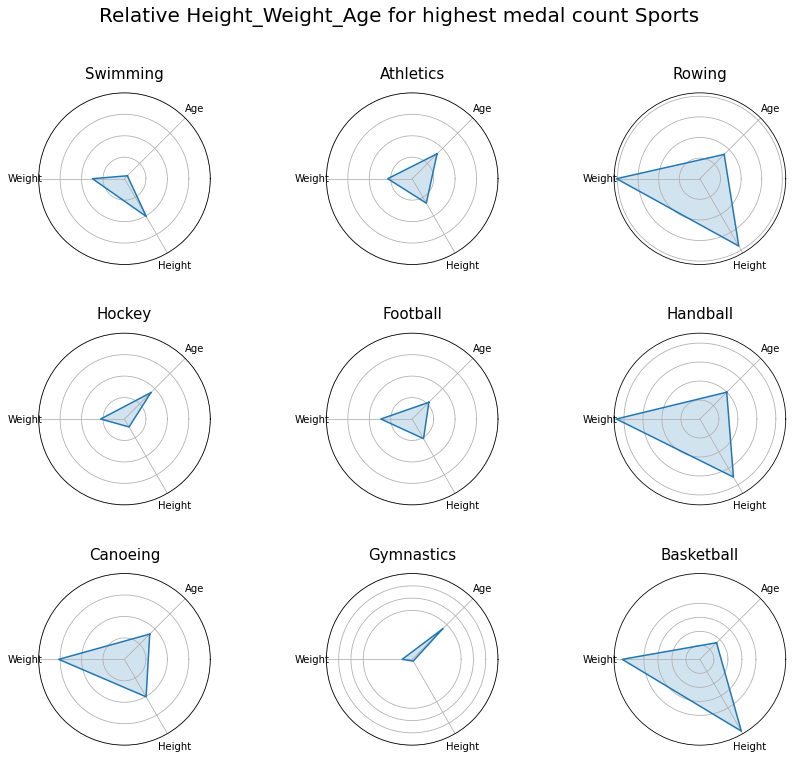

In [48]:
#Sorting the sport with the most medals
lst = list(df[(df['Medal']!='none') & (df['Year']>=1992)][['Sport','Medal']].groupby('Sport').count().sort_values(by='Medal',ascending=False).reset_index().head(9)['Sport'])
pi = np.pi

#Plotting 
fig,ax = plt.subplots(nrows=3,ncols=3 ,subplot_kw=dict(polar=True),figsize=(15,12))
fig.suptitle("Relative Height_Weight_Age for highest medal count Sports",fontsize=20,va='top')
plt.subplots_adjust(hspace=0.4,wspace=0.1)

#boundries
avg_age_min=20
avg_age_max=33
avg_weight_min=65
avg_weight_max=80
avg_height_min=172
avg_height_max=185

#plotting each element
for ind,sport in enumerate(lst):
  sport_info = df[df['Sport']==sport]
  avg_age,avg_weight,avg_height = avg_height_weight_age(sport_info)
  row=int(ind/3);col=int(ind%3)
  avg_age=(avg_age-avg_age_min)/(avg_age_max-avg_age_min)
  avg_weight=(avg_weight-avg_weight_min)/(avg_weight_max-avg_weight_min)
  avg_height=(avg_height-avg_height_min)/(avg_height_max-avg_height_min)
  plots=[avg_age,avg_weight,avg_height,avg_age]
  angles=[pi/4,pi,5*pi/3,pi/4]
  ax[row][col].plot(angles,plots)
  ax[row][col].fill(angles,plots,'tab:blue',alpha=0.2)
  ax[row][col].set_xticks(angles[:-1])
  ax[row][col].set_xticklabels(['Age','Weight','Height'])
  ax[row][col].set_yticks([0.25,0.5,0.75,1])
  ax[row][col].set_yticklabels([])
  ax[row][col].grid(True,axis='y')
  ax[row][col].set_title(sport,fontsize=15)


## Gender EDA

In [33]:
Female = df[(df['Sex']=='F')].groupby(['Year','ID','Sex']).nunique().reset_index().groupby(['Year','Sex']).count().reset_index()
Male = df[(df['Sex']=='M')].groupby(['Year','ID','Sex']).nunique().reset_index().groupby(['Year','Sex']).count().reset_index()

In [34]:
#Appending missing year for females
Female = Female.append({'Year' : 1896 ,'ID':0, 'Sex': 'F'} , ignore_index=True).fillna(0)

#dropping irrilevant columns
Female = Female.drop(Female.columns[3:],axis=1)
Male = Male.drop(Male.columns[3:],axis=1)

#merging tables
participants = Male.merge(Female,how='outer',on='Year',suffixes=("_M","_F")).drop(['Sex_F','Sex_M'],axis=1)

#adding % columns.
participants['Male_per'] = round(100*participants['ID_M']/(participants['ID_M']+participants['ID_F']),0)
participants['Female_per'] = round(100*participants['ID_F']/(participants['ID_M']+participants['ID_F']),0)

#saving old data as olympics table
olympics = participants[['Year','ID_M','ID_F']].astype(float)
olympics.columns = ['Year','male_oly','female_oly']

In [35]:
#Adding more data points func.
def values_filler(column):
  lst = []
  for i in range(0,len(column)-1):
    lst.extend(np.linspace(column.iloc[i],column.iloc[i+1],16,endpoint=False))
  return lst


In [36]:
#applying values_filler to each of the participants columns. 
new_data = []
for name in participants.columns:
  new_data.append(values_filler(participants[name]))

#saving the new_data as a new table
new_data = np.array(new_data)

#saving the participants table as the new table with added column of total & the missing final year
participants_new = pd.DataFrame(data = new_data.transpose(),columns=['Year','ID_M','ID_F','Male_per','Female_per'])
participants = participants_new.append(participants[participants['Year']==2016])
participants['Total'] = 100*((participants['ID_M']+participants['ID_F'])/(participants['ID_M']+participants['ID_F']))

#merging the participants with the old data of male and female to create the markers in animation
participants = participants.merge(olympics,how='left',left_on='Year',right_on='Year')

participants.head()

,Year,ID_M,ID_F,Male_per,Female_per,Total,male_oly,female_oly
0,1896.00,176.0000,0.0000,100.000,0.000,100.0,176.0,0.0
1,1896.25,240.0625,1.4375,99.875,0.125,100.0,NaN,NaN
2,1896.50,304.1250,2.8750,99.750,0.250,100.0,NaN,NaN
3,1896.75,368.1875,4.3125,99.625,0.375,100.0,NaN,NaN
4,1897.00,432.2500,5.7500,99.500,0.500,100.0,NaN,NaN


In [37]:
#creating a shadow line for the animation
path_effects_=[path_effects.SimpleLineShadow(),path_effects.Normal()]

In [38]:
# rc('animation', html='jshtml')
# img = plt.imread('male_female.jpeg')


# #Now to plotting Male participants vs Female participants.
# fig, axes = plt.subplots(figsize=(15,10))
# plt.xticks(fontsize=13)
# plt.yticks(fontsize=13)

# #adding axes 2 for the stackedbar
# axes2 = fig.add_axes([0.35, 0.82, 0.4, 0.03])
# axes2.spines["right"].set_visible(False)
# axes2.spines['bottom'].set_visible(False)
# axes2.spines['top'].set_visible(False)
# axes2.spines['left'].set_visible(False)
# axes2.get_yaxis().set_visible(False)
# axes2.tick_params(axis='y',which='both',bottom=False,top=False,labelbottom=False,right=False)
# axes2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)



# #Male & Female
# #lines
# line, = axes.plot([],[],lw=4,color='tab:blue',label='Male',path_effects=path_effects_)
# line2, = axes.plot([],[],lw=4,color='tab:purple',label='Female',path_effects=path_effects_)
# #markers
# line3, = axes.plot([],[],lw=0,ls="",color='tab:blue',marker='o',markersize=10)
# line4, = axes.plot([],[],lw=0,ls="",color='tab:purple',marker='o',markersize=10)
# #stackedbar for axes2
# bar1, = axes2.barh(y=1,width=participants['Total'].iloc[0],color='tab:blue',align='center')
# bar2, = axes2.barh(y=1,width=participants['Female_per'].iloc[448],color='tab:purple')

# #img background
# axes.imshow(img,extent=[1894,2018,0,9000],aspect='auto',alpha=0.2)

# #males&female % for axes 2
# text_f = axes2.text(5, 0.8,'', fontsize=10,weight='bold',color = 'white')
# text_m = axes2.text(80,0.8,'',fontsize=10,weight='bold',color = 'white')

# #legends limits & title for main axes
# axes.legend(loc=0,fontsize=13)
# axes.set_xlim(left=1894,right=2018)
# axes.set_ylim(bottom=0,top=9000)
# axes.set_title('Olympic Games participation by gender across 120 years',fontsize=24);


# #init func for animation
# def init():
#   line.set_data([], [])
#   line2.set_data([], [])
#   line3.set_data([],[])
#   line4.set_data([],[])
#   text_f.set_text('')
#   text_m.set_text('')
#   return line, line2, line3, line4, text_f,text_m, bar1, bar2, 


# #animation func
# def animate(i):
#   x1 = participants['Year'].iloc[:(i+1)]
#   y1 = participants['ID_M'].iloc[:(i+1)]
#   y2 = participants['ID_F'].iloc[:(i+1)]
#   y3 = participants['Total'].iloc[i]
#   y4 = participants['Female_per'].iloc[i]
#   y5 = participants['male_oly'].iloc[:(i+1)]
#   y6 = participants['female_oly'].iloc[:(i+1)]
#   line.set_data(x1,y1)
#   line2.set_data(x1,y2)
#   line3.set_data(x1,y5)
#   line4.set_data(x1,y6)
#   bar1.set_width(y3)
#   bar2.set_width(y4)
#   text_m.set_text(f"Male {round(participants['Male_per'].iloc[i],0)} %")
#   text_f.set_text(f"Female {round(participants['Female_per'].iloc[i],0)} %")
#   return line, line2, line3, line4, text_f, text_m, bar1, bar2, 

# #creating the animation
# myAnimation = animation.FuncAnimation(fig, animate, init_func=init, frames=np.arange(0, 449, 1),\
#                                       interval=80, blit=False, repeat=True)
# #saving the animation
# myAnimation.save('animation.mp4', fps=50,dpi=100)

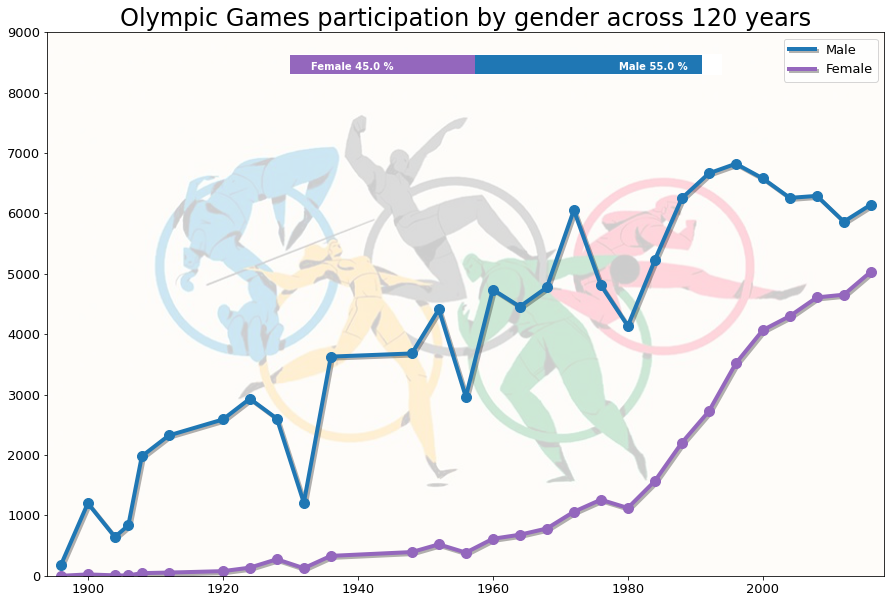

In [39]:
#plotting the last index of the graph
img = plt.imread('male_female.jpeg')

fig, axes = plt.subplots(figsize=(15,10))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#adding axes 2 for the stackedbar
axes2 = fig.add_axes([0.35, 0.82, 0.4, 0.03])
axes2.spines["right"].set_visible(False)
axes2.spines['bottom'].set_visible(False)
axes2.spines['top'].set_visible(False)
axes2.spines['left'].set_visible(False)
axes2.get_yaxis().set_visible(False)
axes2.tick_params(axis='y',which='both',bottom=False,top=False,labelbottom=False,right=False)
axes2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)



#Male & Female
#lines
line, = axes.plot(participants['Year'],participants['ID_M'],lw=4,color='tab:blue',label='Male',path_effects=path_effects_)
line2, = axes.plot(participants['Year'],participants['ID_F'],lw=4,color='tab:purple',label='Female',path_effects=path_effects_)
#markers
line3, = axes.plot(participants['Year'],participants['male_oly'],lw=0,ls="",color='tab:blue',marker='o',markersize=10)
line4, = axes.plot(participants['Year'],participants['female_oly'],lw=0,ls="",color='tab:purple',marker='o',markersize=10)
#stackedbar for axes2
bar1, = axes2.barh(y=1,width=participants['Total'].iloc[448],color='tab:blue',align='center')
bar2, = axes2.barh(y=1,width=participants['Female_per'].iloc[448],color='tab:purple')

#img background
axes.imshow(img,extent=[1894,2018,0,9000],aspect='auto',alpha=0.2)

#males&female % for axes 2
text_f = axes2.text(5, 0.8,f"Female {round(participants['Female_per'].iloc[448],0)} %", fontsize=10,weight='bold',color = 'white')
text_m = axes2.text(80,0.8,f"Male {round(participants['Male_per'].iloc[448],0)} %",fontsize=10,weight='bold',color = 'white')

#legends limits & title for main axes
axes.legend(loc=0,fontsize=13)
axes.set_xlim(left=1894,right=2018)
axes.set_ylim(bottom=0,top=9000)
axes.set_title('Olympic Games participation by gender across 120 years',fontsize=24);

In [41]:
rc('animation', html='jshtml')
rcParams['animation.embed_limit'] = 2**128
#init func for animation
def init():
  line.set_data([], [])
  line2.set_data([], [])
  line3.set_data([],[])
  line4.set_data([],[])
  text_f.set_text('')
  text_m.set_text('')
  return line, line2, line3, line4, text_f,text_m, bar1, bar2, 


#animation func
def animate(i):
  x1 = participants['Year'].iloc[:(i+1)]
  y1 = participants['ID_M'].iloc[:(i+1)]
  y2 = participants['ID_F'].iloc[:(i+1)]
  y3 = participants['Total'].iloc[i]
  y4 = participants['Female_per'].iloc[i]
  y5 = participants['male_oly'].iloc[:(i+1)]
  y6 = participants['female_oly'].iloc[:(i+1)]
  line.set_data(x1,y1)
  line2.set_data(x1,y2)
  line3.set_data(x1,y5)
  line4.set_data(x1,y6)
  bar1.set_width(y3)
  bar2.set_width(y4)
  text_m.set_text(f"Male {round(participants['Male_per'].iloc[i],0)} %")
  text_f.set_text(f"Female {round(participants['Female_per'].iloc[i],0)} %")
  return line, line2, line3, line4, text_f, text_m, bar1, bar2, 

In [42]:
# #creating the animation
# myAnimation = animation.FuncAnimation(fig, animate, init_func=init, frames=np.arange(0, 449, 1),\
#                                       interval=80, blit=False, repeat=True)
# #saving the animation
# myAnimation.save('animation.mp4', fps=50,dpi=100)